This is a progam to optimize the autonomous robot path within a warehouse. The autonomous robot should go from a starting zone to target zone using the most optimal path and considering other priority zones on the way.

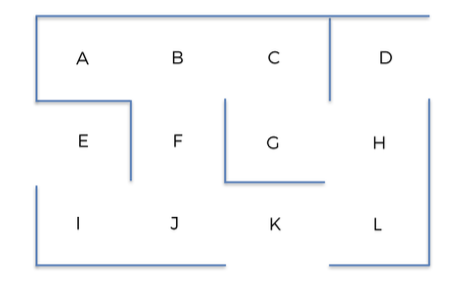

Each zone in the warehouse is labeled as shown above. A robot has to find the optimal path to go from a starting zone to target zone. 
Example - For going from zone L to F, the robot should take the path 
_[L,K,J,F]_ instead of _[L,H,G,C,B,F]_

In [2]:
import numpy as np

# Defining states
# let's define zones as state - s of the Markov decision process
zone_to_state = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11
}

# Defining Actions
# The actions here are the next move the robot can make.
# Example from state A to B, B to C etc hence action also corresondence to the next state
actions = list(range(12))

For defining the reward we need to assume a matrix of every possible move from one state to another in form of a matrix. 
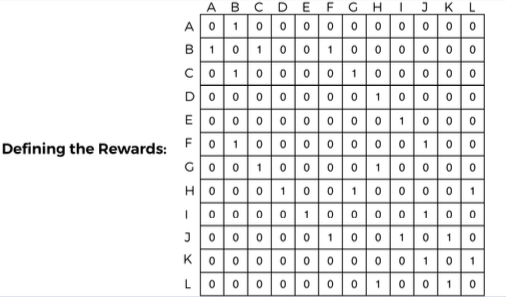

In [3]:
# Defining the reward
# When the robot moves from a state to another it will be rewarded. Example moving from state A to B would earn a reward.
# But certain actions are not possible from a state, example - moving to C from A
# Hence we need to define a matrix of rewards possible on the moves.
# Also assume that for test purpose we need to go from Zone E to G. Hence the reward at state G will be highest - 1000
reward = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0, 0, 1000, 1, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
                   [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])
print(reward)

[[   0    1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    1    0    0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0]
 [   0    1    0    0    0    0    0    0    0    1    0    0]
 [   0    0    1    0    0    0 1000    1    0    0    0    0]
 [   0    0    0    1    0    0    1    0    0    0    0    1]
 [   0    0    0    0    1    0    0    0    0    1    0    0]
 [   0    0    0    0    0    1    0    0    1    0    1    0]
 [   0    0    0    0    0    0    0    0    0    1    0    1]
 [   0    0    0    0    0    0    0    1    0    0    1    0]]


In [4]:
# Define Q values
# to start with let's assume that all the Q values of every state is zero.
# Hence we create a 12 * 12 matrix filled with zeros
Q = np.array(np.zeros([12, 12]))
print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
# Logic to iterate the agent on every possible path starting from a random state this will define Q values in the matrix
# We will iterate over the environment for 1000 times
# This is where we implement the Markov Decision Process to find temporal difference
# TD = R(s,a) + gamma * max Q(s',a') - Q(s,a)
gamma = 0.75
alpha = 0.9
for i in range(1000):
    current_state_S = np.random.randint(0, 12)
    # find out all the possible moves from the randomly selected current state
    possible_moves = []
    for x in range(12):
        if reward[current_state_S, x] > 0:
            possible_moves.append(x)

    # pick a random next state from the possible moves
    selected_action = np.random.choice(possible_moves)

    # in this case selected action is also denoting the next state
    next_state_SPrime = selected_action

    # find the Q value based on formula R(s,a)+ gamma * max_of (Q(s',a'))
    new_Q_value_of_state = reward[current_state_S, selected_action] + \
        gamma * Q[next_state_SPrime, np.argmax(Q[next_state_SPrime,])]
    current_Q_value_of_state = Q[current_state_S, selected_action]

    # find the temporal difference
    TD = new_Q_value_of_state - current_Q_value_of_state

    # update the Q value
    Q[current_state_S, selected_action] = int(Q[current_state_S,
                                                selected_action] + alpha * TD)

# see the updated Q values
print(Q)

[[   0. 1680.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [1260.    0. 2239.    0.    0. 1260.    0.    0.    0.    0.    0.    0.]
 [   0. 1680.    0.    0.    0.    0. 2990.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0. 2239.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  709.    0.    0.    0.]
 [   0. 1680.    0.    0.    0.    0.    0.    0.    0.  945.    0.    0.]
 [   0.    0. 2239.    0.    0.    0. 3986. 2239.    0.    0.    0.    0.]
 [   0.    0.    0. 1680.    0.    0. 2990.    0.    0.    0.    0. 1680.]
 [   0.    0.    0.    0.  532.    0.    0.    0.    0.  945.    0.    0.]
 [   0.    0.    0.    0.    0. 1260.    0.    0.  709.    0. 1260.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.  945.    0. 1680.]
 [   0.    0.    0.    0.    0.    0.    0. 2239.    0.    0. 1260.    0.]]


As the next step we will implement the logic which takes a starting zone and find the optimal route to target zone (G). 
To achieve this we need a reverse mapping from state numerical representation to zone alphabetical representation

In [6]:
# mapping from state numbet to zone name
state_to_zone = dict(
    map(lambda entry: (entry[1], entry[0]), zone_to_state.items()))
print(state_to_zone)

# another way to do this is using dict comprehension
state_to_zone = {entry[1]: entry[0] for entry in zone_to_state.items()}

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L'}


In [8]:
# function to find the optimal route from start to finish
def findTheOptimalRoute(start_zone, end_zone="G"):
    # convert start_zone and end_zone to numerical representation
    start_state = zone_to_state[start_zone]
    end_state = zone_to_state[end_zone]
    optimal_path = [state_to_zone[start_state]]

    # implement a while loop to keep iterating the states until we reach the end_zone
    while (start_state != end_state):
        # find the maximum value next state from start_state
        next_state = np.argmax(Q[start_state,])

        # add to the optimal path
        optimal_path.append(state_to_zone[next_state])

        # make identified next state as start state to identify further next state
        start_state = next_state
    print(optimal_path)


findTheOptimalRoute("E")

['E', 'I', 'J', 'F', 'B', 'C', 'G']
